In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
from numpy.random import multivariate_normal
from sklearn.neighbors import KernelDensity

In [2]:
D = 20

In [3]:
sigma = 0.25

In [4]:
mu = np.zeros(D)
S = sigma * np.eye(D)

In [5]:
r_plot = np.linspace(0.0, 4.0, 1000)

In [6]:
x = multivariate_normal(mean=mu, cov=S, size=100000)

In [7]:
r = norm(x, ord=2, axis=1)  # calculate the radius

In [8]:
kde = KernelDensity(kernel="gaussian", bandwidth=0.1).fit(r.reshape(-1, 1))

In [9]:
log_likelihood = kde.score_samples(r_plot.reshape(-1, 1))
pdf_kde = np.exp(log_likelihood)

In [10]:
cnts, bins = np.histogram(r, bins=np.arange(0.0, 4.0, 0.1))

In [11]:
pdf_hist = cnts / len(r) / np.median(np.diff(bins))

In [12]:
def r_dist(D, KDE=True, n_samples=500_000):
    """
    Args:
        D (int): dimension of the Gaussian
        KDE (bool): use kernel density estimation
        n_samples (int): number of samples to generate (reduce the number when using KDE)
    
    Returns:
        rr (np.array, float): r values for plotting
        pdf (np.array, float): probability density function
    """
    mu = np.zeros(D)
    S = sigma * np.eye(D)
    x = multivariate_normal(mean=mu, cov=S, size=n_samples)
    r = norm(x, ord=2, axis=1)  # calculate the radius
    
    if KDE:
        kde = KernelDensity(kernel="gaussian", bandwidth=0.05).fit(r.reshape(-1, 1))
        log_likelihood = kde.score_samples(r_plot.reshape(-1, 1))
        pdf = np.exp(log_likelihood)
        rr = r_plot
    else:
        cnts, bins = np.histogram(r, bins=np.linspace(0.0, 4.0, 60))
        pdf = cnts / len(r) / np.median(np.diff(bins))
        rr = (bins[:-1] + bins[1:]) / 2
    
    return rr, pdf

In [13]:
D_list = [1, 2, 20]

In [14]:
color_list = ['r', 'g', 'b']
pos_list = [(0.3, 1.5), (0.8, 1.0), (2.6, 0.8)]

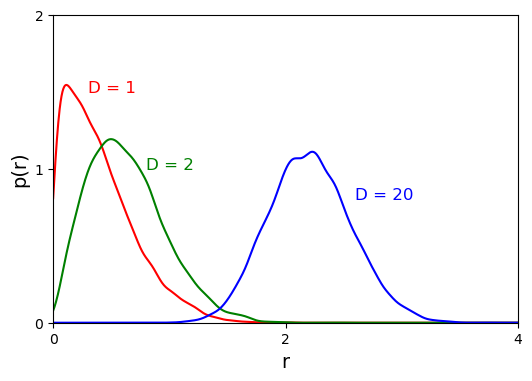

In [16]:
plt.figure(figsize=(6, 4))

for D, color, pos in zip(D_list, color_list, pos_list):
    rr, pdf = r_dist(D, KDE=True, n_samples=10_000)
    plt.plot(rr, pdf, c=color)
    plt.text(*pos, f'D = {D}', c=color, fontsize=12)

plt.xlim(0, 4)
plt.ylim(0, 2)
plt.xticks(np.arange(0, 5, 2))
plt.yticks(np.arange(0, 2.5, 1.0))
plt.xlabel('r', fontsize=14)
plt.ylabel('p(r)', fontsize=14)
plt.show()